# **Naive Bayes Prediction and Logistic Regression Model**

# Import Library dan Dataset

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('heart.csv')

# 1.Data Exploration

In [250]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Data exploration

In [251]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


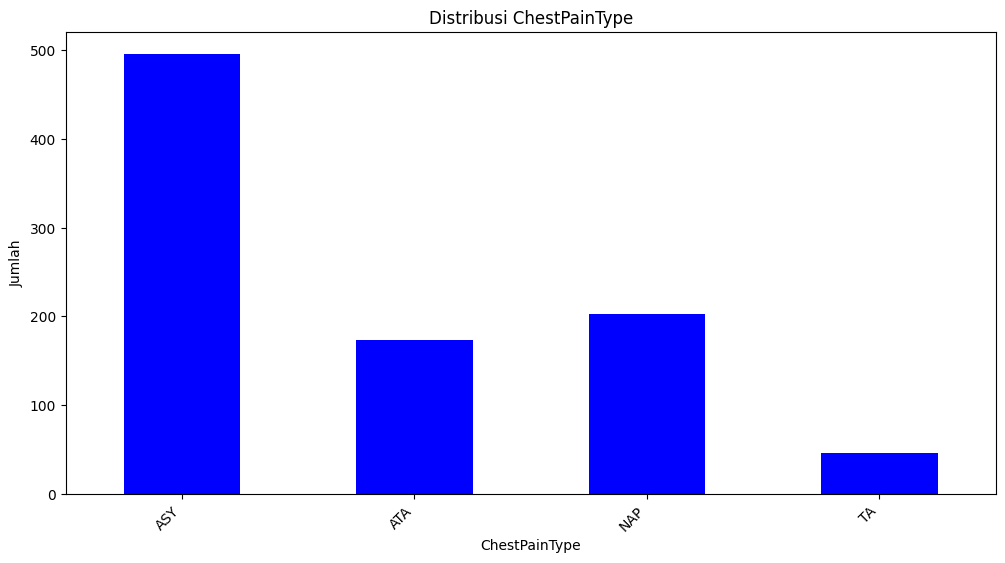

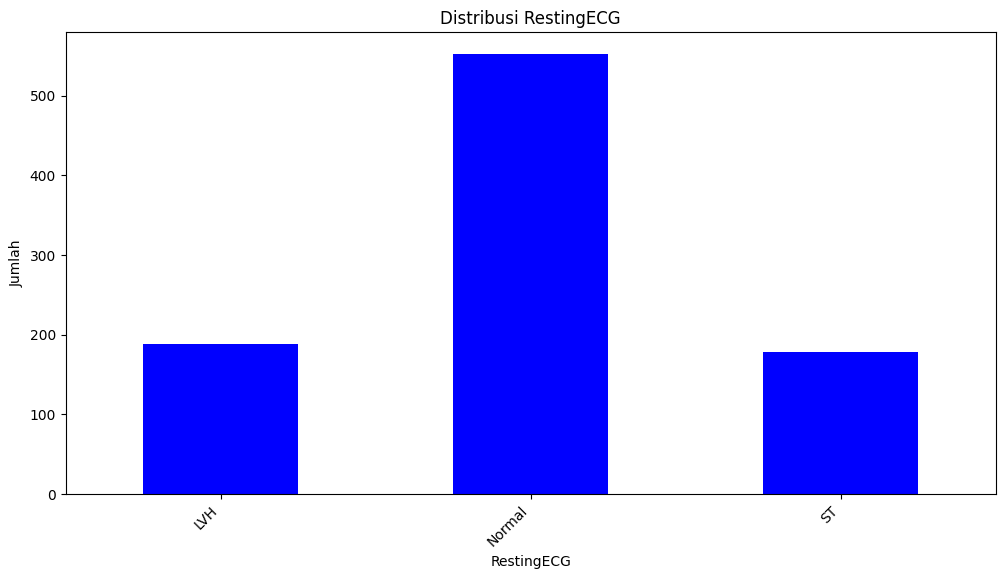

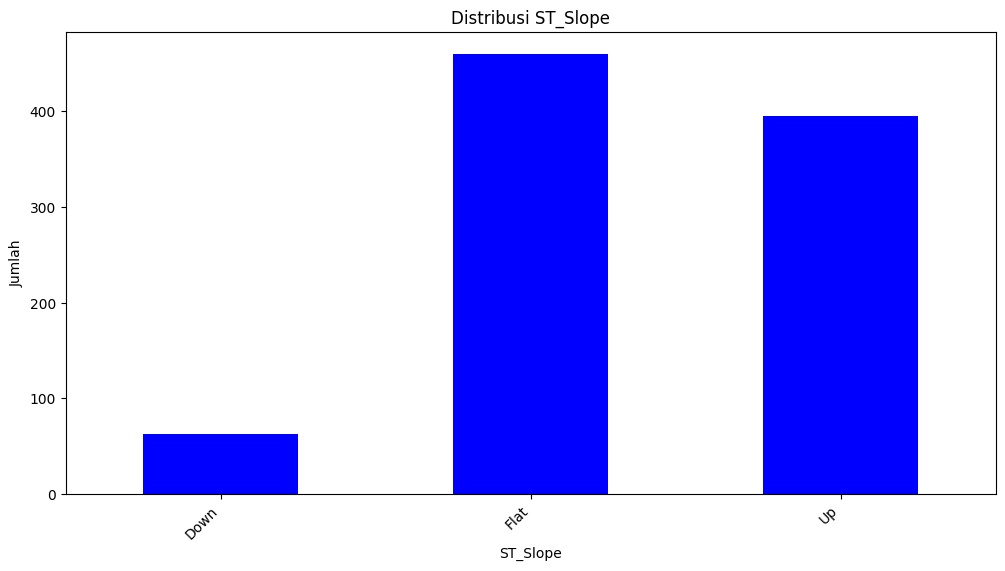

In [253]:
def create_barplot(data, nama_kolom):
  plt.figure(figsize=(12, 6))
  sorted_counts = data.value_counts().sort_index()
  sorted_counts.plot(kind='bar', color='Blue')
  plt.xlabel(f'{nama_kolom}')
  plt.ylabel('Jumlah')
  plt.title(f'Distribusi {nama_kolom}')
  plt.xticks(rotation=45, ha='right')
  plt.show()

cols = df.select_dtypes(include=object).columns
for col in cols:
  if len(df[col].unique())>2:
    if len(df[col].unique())<5:
      create_barplot(df[col], col)


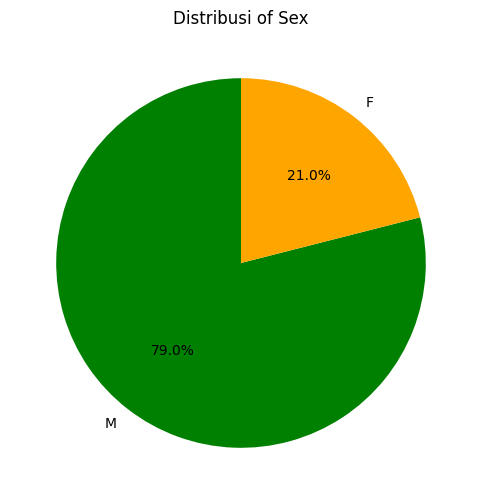

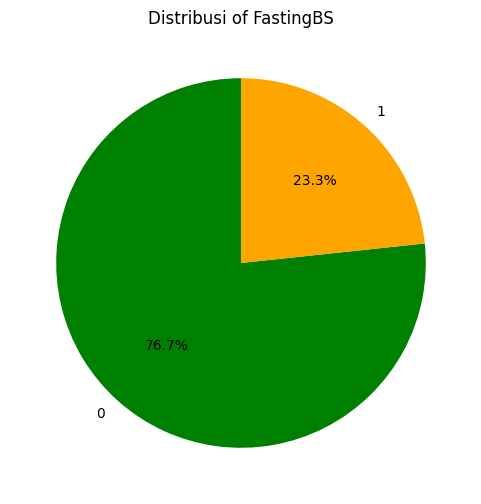

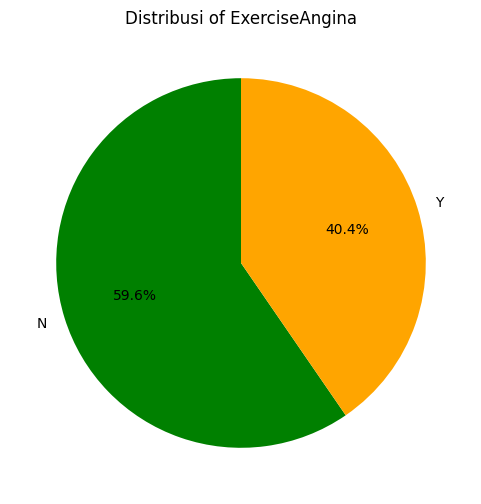

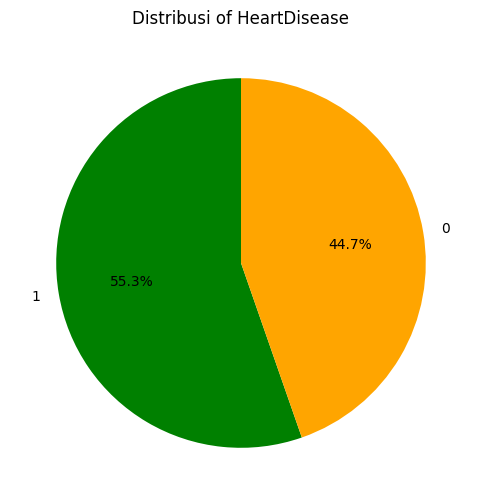

In [254]:
for column in df.columns:
  if df[column].nunique()==2:
    value_counts=df[column].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(value_counts,labels=value_counts.index,autopct='%1.1f%%',startangle=90, colors=['green', 'orange'])
    plt.title(f"Distribusi of {column}")
    plt.show()


# 2.Data Cleansing

Missing Values

In [255]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Outlier

Jumlah outlier pada 'HeartDisease': 0
Jumlah outlier pada 'Age': 0
Jumlah outlier pada 'RestingBP': 28
     RestingBP
109        190
123        180
189        180
190        180
241        200
Jumlah outlier pada 'Cholesterol': 183
     Cholesterol
28           468
30           518
69           412
76           529
103          466
Jumlah outlier pada 'FastingBS': 214
    FastingBS
36          1
38          1
52          1
84          1
86          1
Jumlah outlier pada 'MaxHR': 2
     MaxHR
370     63
390     60
Jumlah outlier pada 'Oldpeak': 16
     Oldpeak
68       4.0
166      5.0
324     -2.6
500      4.0
521      4.0


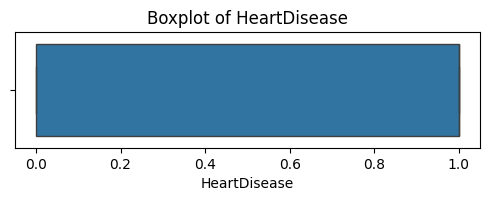

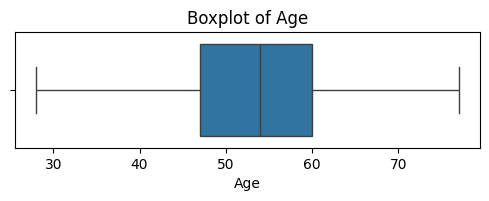

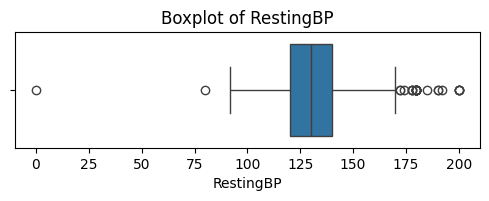

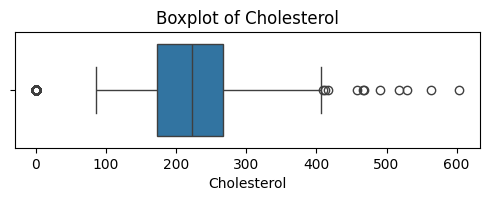

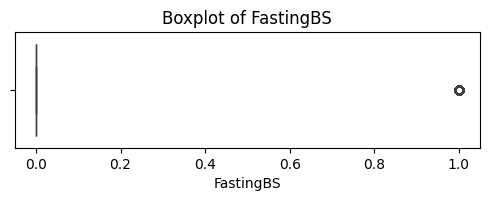

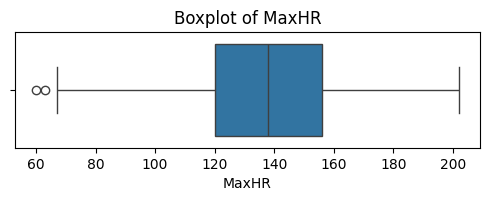

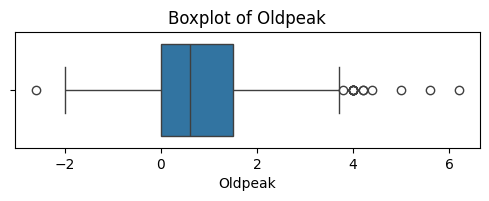

In [256]:
# Pilih variabel numerik saja
numerik_cols = ['HeartDisease', 'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Fungsi untuk mendeteksi outlier dengan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Tampilkan outlier per kolom numerik
for col in numerik_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Jumlah outlier pada '{col}': {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]].head())  # Tampilkan contoh outlier

# Opsional: Visualisasi dengan boxplot
for col in numerik_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [257]:
# Kolom yang ingin dibersihkan dari outlier
kolom_outlier = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Fungsi untuk menghitung batas bawah dan atas outlier menggunakan IQR
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Iterasi dan hapus baris yang mengandung outlier di kolom-kolom tersebut
for kolom in kolom_outlier:
    lower, upper = iqr_bounds(df[kolom])
    df = df[(df[kolom] >= lower) & (df[kolom] <= upper)]

# Setelah ini, df sudah bebas dari outlier di kolom-kolom tersebut
print("Jumlah data setelah menghapus outlier:", len(df))

Jumlah data setelah menghapus outlier: 701


In [258]:
print(df['ExerciseAngina'].value_counts())


ExerciseAngina
N    439
Y    262
Name: count, dtype: int64


Data Duplikasi

In [259]:
df.duplicated().sum()

np.int64(0)

# 3.Data Encoding

In [260]:
kolom_kategorik = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in kolom_kategorik:
    df[col] = le.fit_transform(df[col])

<Axes: >

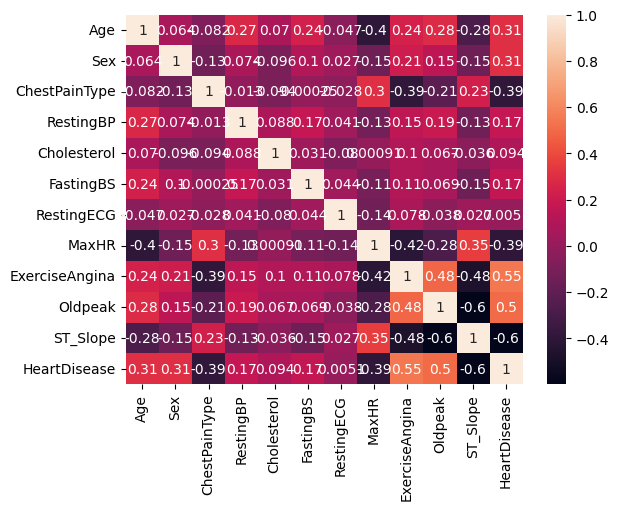

In [261]:
sns.heatmap(df.corr(), annot=True)

# 4.Preprocessing Data

In [262]:
X = df.drop('HeartDisease', axis=1)  # fitur
y = df['HeartDisease']               # target

In [263]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             701 non-null    int64  
 1   Sex             701 non-null    int64  
 2   ChestPainType   701 non-null    int64  
 3   RestingBP       701 non-null    int64  
 4   Cholesterol     701 non-null    int64  
 5   FastingBS       701 non-null    int64  
 6   RestingECG      701 non-null    int64  
 7   MaxHR           701 non-null    int64  
 8   ExerciseAngina  701 non-null    int64  
 9   Oldpeak         701 non-null    float64
 10  ST_Slope        701 non-null    int64  
 11  HeartDisease    701 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 71.2 KB


# **Naive Bayes Model**

In [265]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

# Evaluation Model

In [266]:
y_pred = nb_model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.851063829787234
Confusion Matrix:
 [[58  9]
 [12 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        67
           1       0.87      0.84      0.86        74

    accuracy                           0.85       141
   macro avg       0.85      0.85      0.85       141
weighted avg       0.85      0.85      0.85       141



In [267]:
print(X.shape)  # contoh output: (918, 11)
print(X.columns)  # pastikan nama-nama kolom yang digunakan untuk training


(701, 11)
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [268]:
pasien_baru = np.array([[63, 1, 145, 233, 1, 0, 150, 0, 2, 1, 1]])  # contoh data pasien
print("Prediksi:", nb_model.predict(pasien_baru))


Prediksi: [1]


# **Logistic Regression Model**

# Logistic Regression Training

In [269]:
# 1. Inisialisasi scaler
scaler = StandardScaler()

# 2. Fit & transform hanya pada data training
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform pada data testing
X_test_scaled = scaler.transform(X_test)

In [270]:
#Training Model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [271]:
#Prediksi Model
y_pred_log_reg = log_reg_model.predict(X_test)

In [272]:
#Evaluasi Model
print("\nLogistic Regression Model:")
print("Akurasi:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Model:
Akurasi: 0.8439716312056738
Confusion Matrix:
 [[57 10]
 [12 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        67
           1       0.86      0.84      0.85        74

    accuracy                           0.84       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.84      0.84      0.84       141



In [276]:
# Prediksi pasien dengan model logistic regression
pasien_baru_scaled = scaler.transform(pasien_baru)
log_reg_model.predict(pasien_baru_scaled)
hasil = log_reg_model.predict(pasien_baru_scaled)
print("Prediksi pasien baru (1 = Risiko, 0 = Tidak):", hasil)

Prediksi pasien baru (1 = Risiko, 0 = Tidak): [0]


In [274]:
# Naive Bayes
print("Naive Bayes Prob:", nb_model.predict_proba(pasien_baru))

# Logistic Regression
print("Logistic Regression Prob:", log_reg_model.predict_proba(pasien_baru))


Naive Bayes Prob: [[0. 1.]]
Logistic Regression Prob: [[1.00000000e+00 2.25755887e-59]]


In [ ]:
import streamlit as st


st.set_page_config(layout="wide")
st.title("Heart Disease Prediction Dashboard")

# Load dataset
@st.cache_data
def load_data():
    return pd.read_csv("heart.csv")

df = load_data()
st.subheader("Dataset")
st.dataframe(df.head())

# Exploratory Data Analysis
st.subheader("Data Visualization")
with st.expander("Show Correlation Heatmap"):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
    st.pyplot(fig)

with st.expander("Show Histograms"):
    selected_col = st.selectbox("Select column to plot histogram", df.columns)
    fig2, ax2 = plt.subplots()
    sns.histplot(df[selected_col], kde=True, ax=ax2)
    st.pyplot(fig2)

# Feature selection and preprocessing
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model selection
st.subheader("Model Training")
model_choice = st.selectbox("Choose a model", ["Gaussian Naive Bayes", "Logistic Regression"])

if model_choice == "Gaussian Naive Bayes":
    model = GaussianNB()
else:
    model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

st.write("### Accuracy:", accuracy_score(y_test, y_pred))
st.text("Confusion Matrix")
st.dataframe(confusion_matrix(y_test, y_pred))
st.text("Classification Report")
st.text(classification_report(y_test, y_pred))

# Predict on custom input
st.subheader("Make a Prediction")
input_values = []

st.write("Enter feature values:")
for i, col in enumerate(df.drop('target', axis=1).columns):
    val = st.number_input(f"{col}", value=float(df[col].mean()))
    input_values.append(val)

input_array = scaler.transform([input_values])
prediction = model.predict(input_array)[0]

st.write("### Predicted Target:", prediction)
